In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv1D, Conv1DTranspose, MaxPooling1D, Concatenate, Input, Cropping1D, Flatten
from keras.models import Model
from tensorflow import keras

In [3]:
Fs = 1 #Hz
N = 100
t = np.arange(0,N)

#sample of N = 100 is taken for visualization purpose

#input_signal
x_sample = np.sin(0.15*2*np.pi*t)+np.sin(0.23*2*np.pi*t)
#Desired_output_signal
y_sample = np.sin(0.24*2*np.pi*t)+np.sin(0.38*2*np.pi*t)

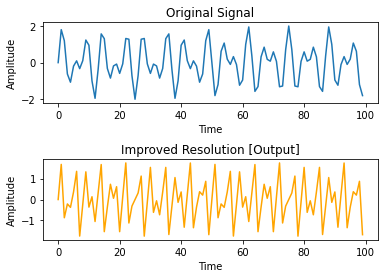

In [4]:
fig, axs = plt.subplots(2,1)
axs[0].plot(t,x_sample)
axs[0].set(ylabel ='Amplitude')
axs[0].set(xlabel ='Time')
axs[0].set_title("Original Signal")

axs[1].plot(t,y_sample, color = 'orange')
axs[1].set(ylabel ='Amplitude')
axs[1].set(xlabel ='Time')
axs[1].set_title("Improved Resolution [Output]")

plt.subplots_adjust(hspace=0.7)

In [5]:
#Actual dataset
Fs = 1 #Hz
N = 1024
t = np.arange(0,N)
#x : original signal
x = np.sin(0.15*2*np.pi*t)+np.sin(0.23*2*np.pi*t)
#y : Desired output of higher resolution
y = np.sin(0.24*2*np.pi*t)+np.sin(0.38*2*np.pi*t)

In [6]:
#U-net Architecture
#ConvolutioN Layer

l1 =  Input(shape=(1024,1))

In [7]:
#1 >> 32
conv_1 = Conv1D(32, 1, activation = 'tanh')(l1)
conv_2 = Conv1D(32, 1, activation = 'tanh')(conv_1)
pool_1 = MaxPooling1D(pool_size=1,strides=2, padding='same')(conv_2)

#32 >> 64
conv_3 = Conv1D(64, 1, activation = 'tanh')(pool_1)
conv_4 = Conv1D(64, 1, activation = 'tanh')(conv_3)
pool_2 = MaxPooling1D(pool_size=1,strides=2, padding='same')(conv_4)

#64 >> 128
conv_5 = Conv1D(128, 1, activation = 'tanh')(pool_2)
conv_6 = Conv1D(128, 1, activation = 'tanh')(conv_5)
pool_3 = MaxPooling1D(pool_size=1,strides=2, padding='same')(conv_6)

#128 >> 256
conv_7 = Conv1D(256, 1, activation = 'tanh')(pool_3)
conv_8 = Conv1D(256, 1, activation = 'tanh')(conv_7)


In [8]:
#Deconvolution or expanding layer

#256 >> 128
up_conv_8a = Conv1DTranspose(128, 1,strides=2,padding="same")(conv_8)

#128+128 = 256
up_conv_8b = Concatenate(axis=1)([up_conv_8a, conv_6])

#256 >> 128
pool_4 = MaxPooling1D(pool_size=1,strides=2,padding="same")(up_conv_8b)
conv_9 = Conv1D(128, 1, activation = 'tanh')(pool_4)
conv_10 = Conv1D(128, 1, activation = 'tanh')(conv_9)

#64+64 = 128
up_conv_10a = Conv1DTranspose(64, 1,strides=2,padding="same")(conv_10)
up_conv_10b = Concatenate(axis=1)([up_conv_10a, conv_4])

#128 >> 64
pool_5 = MaxPooling1D(pool_size=1,strides=2,padding="same")(up_conv_10b)
conv_11 = Conv1D(64, 1, activation = 'tanh')(pool_5)
conv_12 = Conv1D(64, 1, activation = 'tanh')(conv_11)

#32+32 = 64
up_conv_12a = Conv1DTranspose(32, 1,strides=2,padding="same")(conv_12)
up_conv_12b = Concatenate(axis=1)([up_conv_12a, conv_2])
pool_6 = MaxPooling1D(pool_size=1,strides=2,padding="same")(up_conv_12b)

#64 >> 32
conv_13 = Conv1D(32, 1, activation = 'tanh')(pool_6)
conv_14 = Conv1D(32, 1, activation = 'tanh')(conv_13)

#32 >> 1
out = Conv1D(1, 1,activation ='tanh')(conv_14)

In [9]:
u_net = Model(l1,out)

In [10]:
u_net.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1024, 32)     64          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1024, 32)     1056        conv1d[0][0]                     
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 512, 32)      0           conv1d_1[0][0]                   
_______________________________________________________________________________________

In [11]:
u_net.compile(optimizer ='adam', loss ='mse')

inp = x.reshape(1,1024)
out = y.reshape(1,1024)

In [12]:
u_net.fit(inp,out,epochs=400,batch_size=2)

Epoch 1/400
1/1 [==============================] - 0s 2ms/step - loss: 1.0561
Epoch 2/400
1/1 [==============================] - 0s 1ms/step - loss: 1.0608
Epoch 3/400
1/1 [==============================] - 0s 2ms/step - loss: 1.0303
Epoch 4/400
1/1 [==============================] - 0s 2ms/step - loss: 1.0111
Epoch 5/400
1/1 [==============================] - 0s 2ms/step - loss: 1.0184
Epoch 6/400
1/1 [==============================] - 0s 1ms/step - loss: 1.0147
Epoch 7/400
1/1 [==============================] - 0s 2ms/step - loss: 1.0026
Epoch 8/400
1/1 [==============================] - 0s 2ms/step - loss: 0.9954
Epoch 9/400
1/1 [==============================] - 0s 1000us/step - loss: 0.9931
Epoch 10/400
1/1 [==============================] - 0s 3ms/step - loss: 0.9916
Epoch 11/400
1/1 [==============================] - 0s 1000us/step - loss: 0.9897
Epoch 12/400
1/1 [==============================] - 0s 5ms/step - loss: 0.9873
Epoch 13/400
1/1 [==============================] - 0s 

In [14]:
pred = u_net.predict(inp)

In [15]:
#sample of output signal for visulaization
pred_sample = pred[0][:100]

Text(0.5, 1.0, 'predicted/enhanced signal')

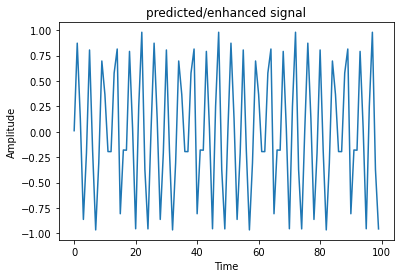

In [16]:
plt.plot(pred_sample)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("predicted/enhanced signal")

Text(0.5, 1.0, 'OUTPUT')

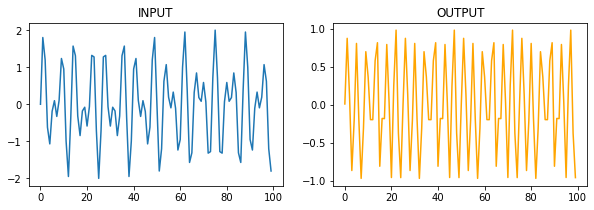

In [17]:
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(x_sample)
axs[0].set_title("INPUT")
axs[1].plot(pred_sample, color='orange')
axs[1].set_title("OUTPUT")

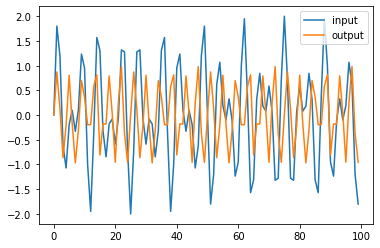

In [20]:
plt.plot(x_sample, label='input')
plt.plot(pred_sample, label ='output')
plt.legend(loc='best')

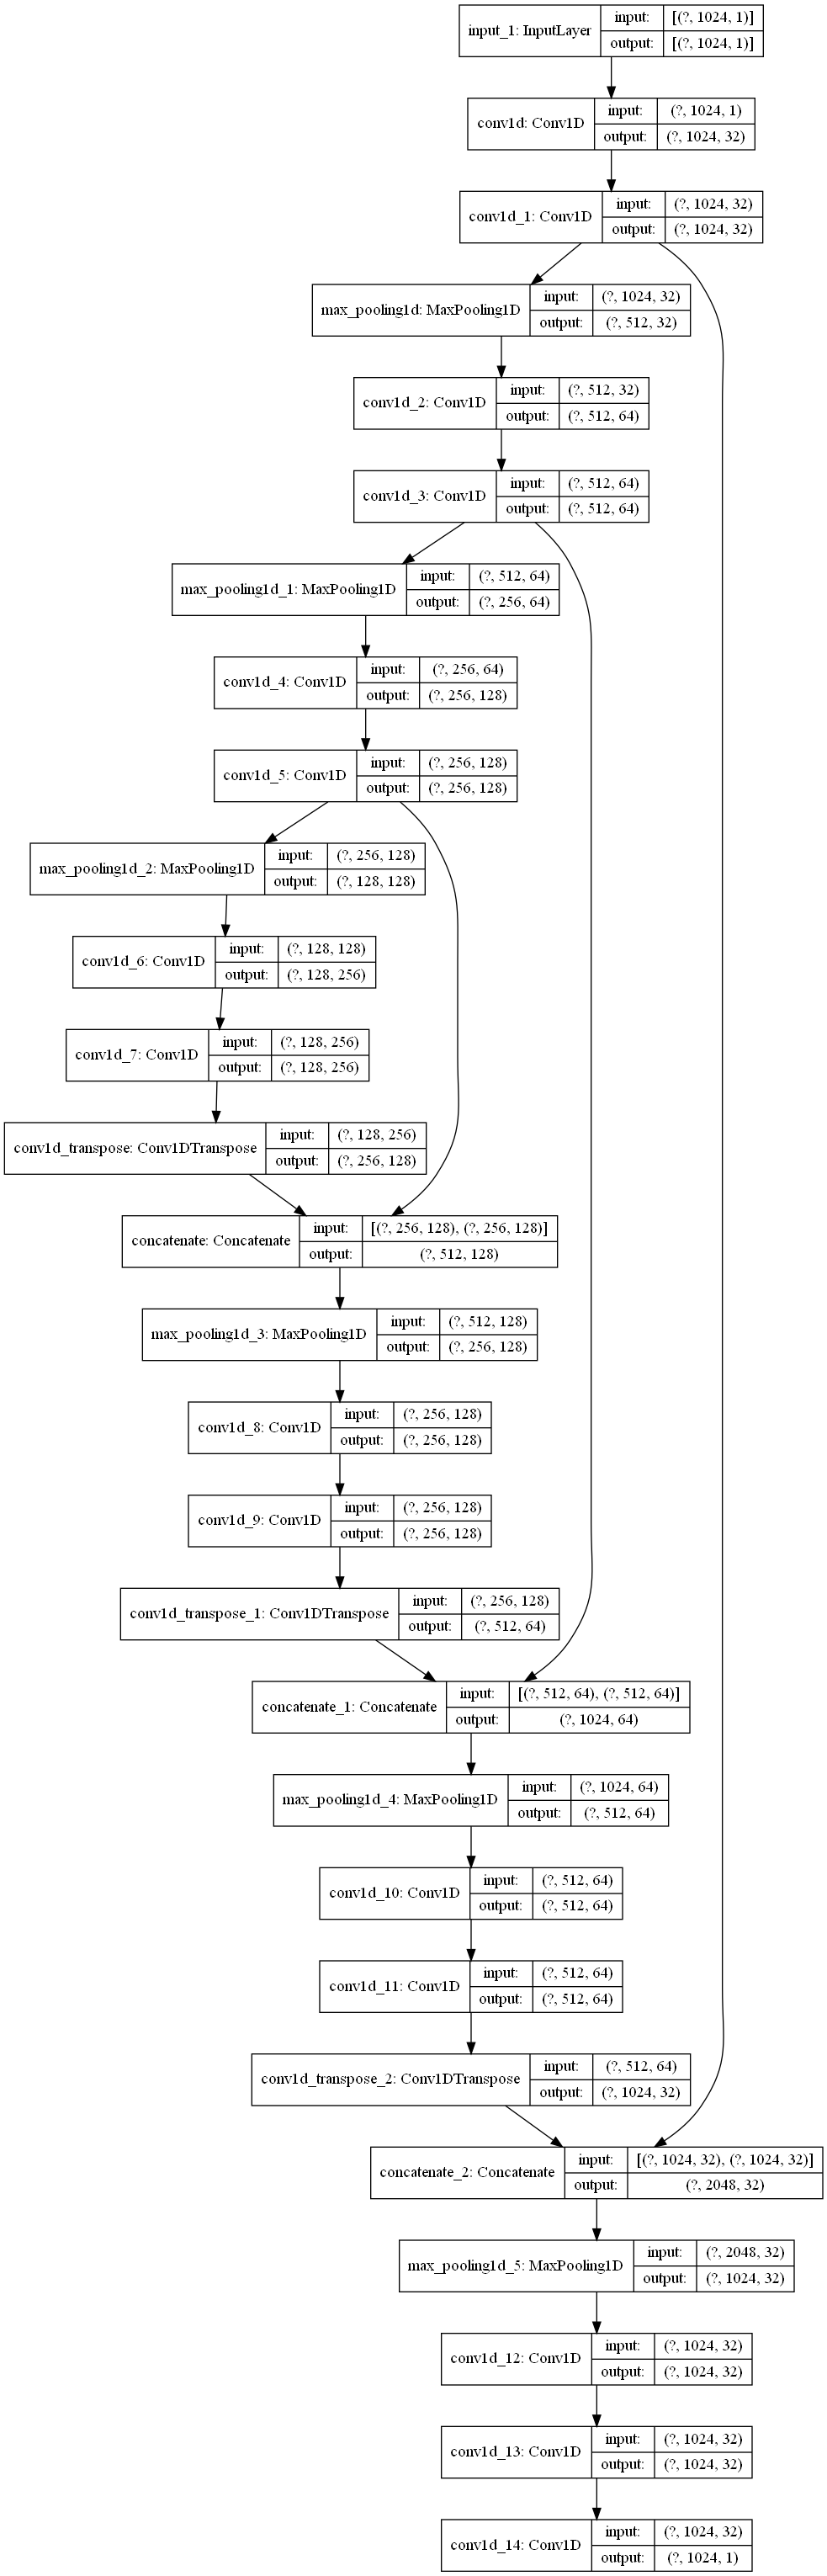

In [22]:
#model_architecture_visualization
keras.utils.plot_model(u_net, to_file = "Model.png", show_shapes=True)